# Sales Analysis

- Ref:18-1001

### Import Necessary Libraries

In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Task # 1: Merge the 12 months of sales data into a single CSV file

In [4]:
# df = pd.read_csv("./Sales_Data/Sales_April_2019.csv") # sible file read (./ means go inside other folder)

# Step 1 : read the file
files = [file for file in os.listdir('./Sales_Data/')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [8]:
# Step 2: Concate all files into a single csv file
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
# all_months_data.head()
# all_months_data.to_csv("all_data.csv", index=False) # update data file, Uncomment when needed

#### Read in updated dataframe

In [9]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Up the data

In [20]:
nan_df = all_data[all_data.isna().any(axis=1)] # NaN is available in all 6 cols
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


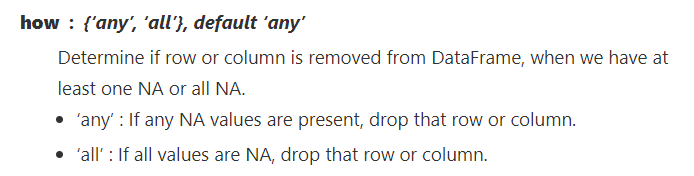

#### Get rid of text (e.g Or) in Order Date Column

In [23]:
# temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']  # Remove those rows where header duplicated
# temp_df.head() # output was as follows

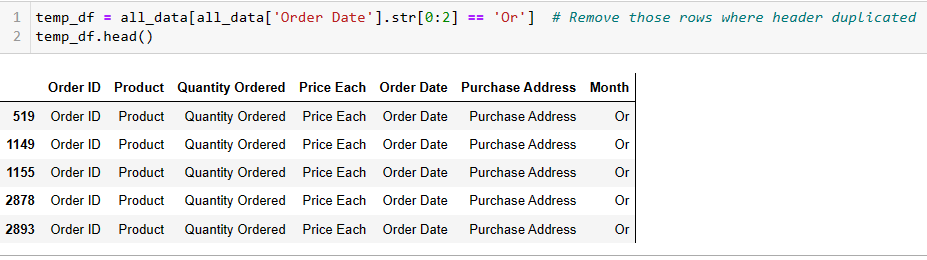

In [19]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']  # original data frame where str !='Or'

#### Convert Columns to correct type

In [26]:
# Type Correction for qty order, preprocessed for calculing sales Revenue
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data ['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

### Augment data with additional columns

### Task 2: Add Month Column

- Split first two str from Order Date
- Month must a numerical value, so need to convert; but if there are any NaN that must be process first before num conversion

In [21]:
all_data['Month'] = all_data['Order Date'].str[0:2] # extract first two from "Order Date"
all_data['Month'] = all_data['Month'].astype('int32')  # Data str converted into int
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [25]:
# Add Month col - altenative method

# all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
# all_data.head()

- all_data['Month'] = all_data['Month'].astype('int32') >> return below val error, because there are some "Or..." in Order date, which need to fixed
- ValueError: invalid literal for int() with base 10: 'Or' 

### Task 3: Add a Sales Column

In [27]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data ['Price Each']  # Sales Qty X Price
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add a City Column

In [40]:
# Let's use .apply()
# We want to extrat 2 value or 1 index of address col e.g "Dallas" in between commas

def get_city(address):
    return address.split(',')[1]

all_data['Column'] = all_data['Purchase Address'].apply(lambda x: get_city(x)) 

all_data.head()

# Note:
# all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# Lambda x: considered "Purchase Addr" as x & apply by split param, where x is cell context e.g pur address
# index 1: that mean 2nd val e.g Dallas

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### Add City Col by Defining a function  or alternative method

# Data Exploration

#### Question 1: What was the best month for sales ? How much was earned that month ?

In [37]:
result = all_data.groupby('Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


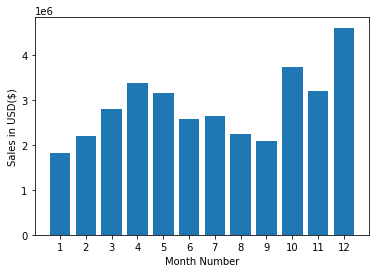

In [36]:
months = range(1, 13) # 12 months

plt.bar(months, result['Sales'])
plt.xticks(months) # show all months
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

# Observation:
# Got height sales in Dec